In [42]:
import pandas as pd
import numpy as np 
import sqlite3
import nltk
#nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import scipy as sp
import sqlite3
import re
from datetime import datetime
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [52]:
conn = sqlite3.connect("/Users/jackmackle/py_work/jacksbot/storage/storage.db")
df = pd.read_sql_query("SELECT * FROM tweets", conn)
conn.close()

# VADER - No Cleaning

In [32]:
sid = SentimentIntensityAnalyzer()

In [33]:
tw_text_list = df["full_text"].tolist()
polarity_scores = list(map(sid.polarity_scores, tw_text_list))
compound = list(map(lambda x: x["compound"], polarity_scores))

In [34]:
df["compound_pol"] = compound

<AxesSubplot:xlabel='compound_pol', ylabel='Count'>

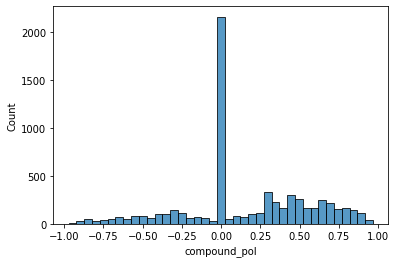

In [35]:
sns.histplot(data=df, x="compound_pol")

# VADER - Cleaning

In [53]:
df_clean = df

In [54]:
tw_text_list = df_clean["full_text"].tolist()

def remove_handles(text):
    r = re.findall("@[\w]*", text)
    for i in r:
        text = re.sub(i, "", text)
        
    return text

tw_text_list = list(map(remove_handles, tw_text_list))

def remove_links(text):
    r = re.findall("https?://[A-Za-z0-9./]*", text)
    for i in r:
        text = re.sub(i, "", text)
        
    return text

tw_text_list = list(map(remove_links, tw_text_list))

In [55]:
polarity_scores = list(map(sid.polarity_scores, tw_text_list))
compound = list(map(lambda x: x["compound"], polarity_scores))

In [56]:
df_clean["compound_pol"] = compound

<AxesSubplot:xlabel='compound_pol', ylabel='Count'>

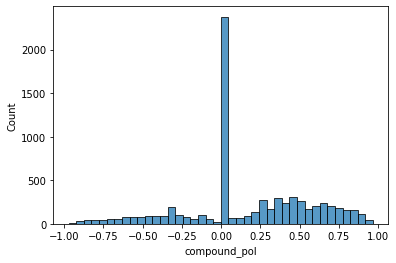

In [57]:
sns.histplot(data=df_clean, x="compound_pol")

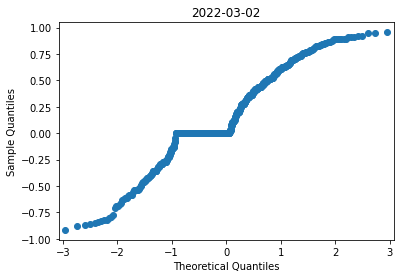

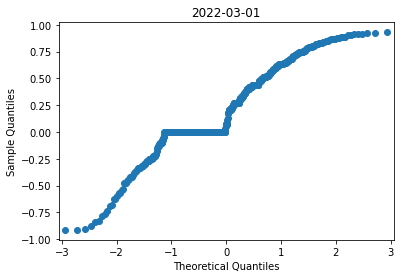

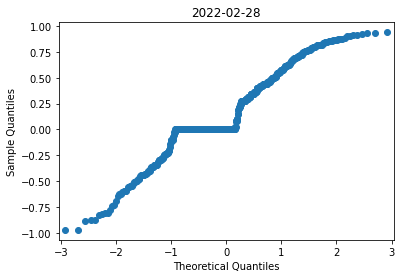

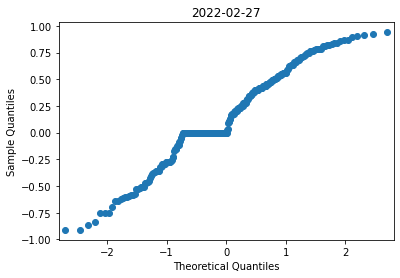

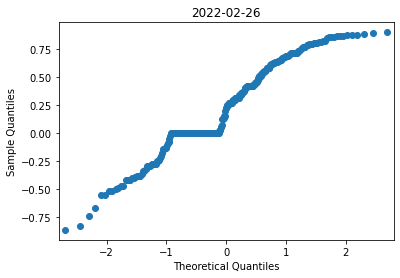

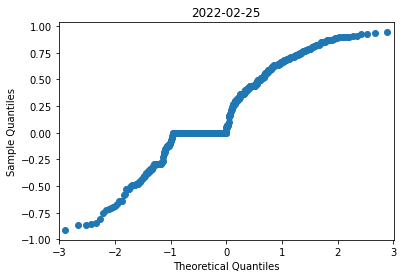

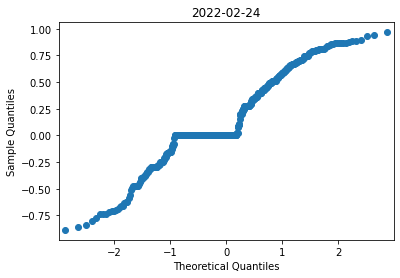

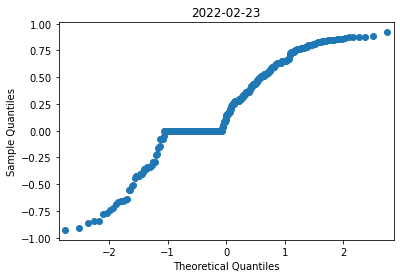

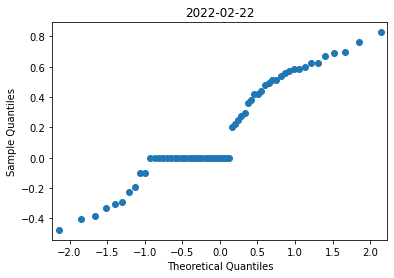

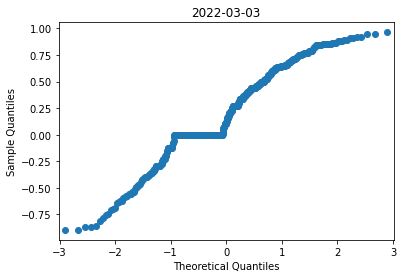

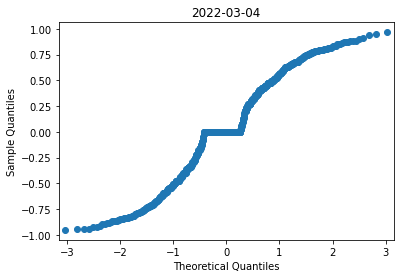

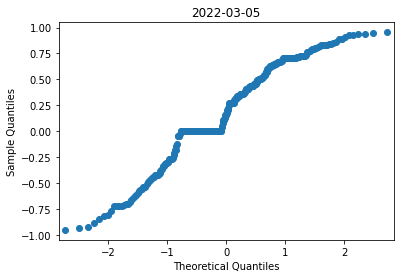

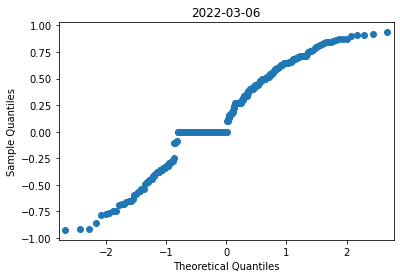

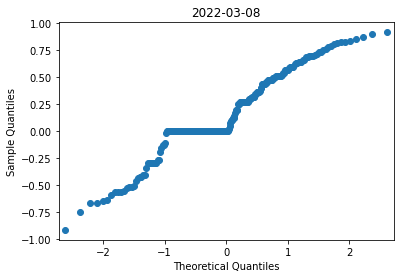

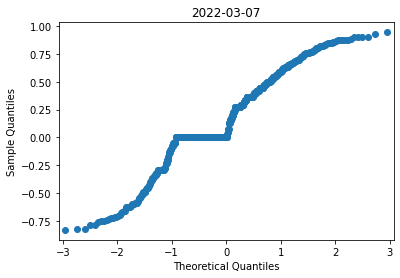

In [51]:
for i in df_clean['stripdate'].unique():
    fig = sm.qqplot(df_clean[df_clean['stripdate'] == i]['compound_pol'])
    plt.title(i)
    plt.show()

In [58]:
df_clean.columns

Index(['tweet_id', 'created_at', 'in_reply_to_status', 'full_text', 'verified',
       'retweet_count', 'user_id', 'user_name', 'user_followers_coubt',
       'compound_pol'],
      dtype='object')

In [59]:
df_cbs = df_clean.groupby("user_name", as_index=False)["compound_pol"].mean()
df_cbs.sort_values(by="compound_pol", ascending=False)

,user_name,compound_pol
231,DMSeII4Mayor,0.9565
937,WallStreetU3O8,0.9434
738,SamTheCarpetMan,0.9401
550,MiningFan,0.9297
698,ReinhardAustrup,0.9246
...,...,...
298,EriCheri3,-0.9112
1391,saaedsabzian,-0.9136
1098,drizham,-0.9186
741,Sarah4Durham,-0.9222


In [60]:
#pd.to_datetime(pd.Series(['2022-02-27 19:15:57+00:00']), format="%m/%d/%Y")

strip_date = list(map(lambda x: x.split()[0], df_clean["created_at"].to_list()))
df_clean["stripdate"] = strip_date

In [61]:
df_clean[["stripdate", "compound_pol"]].groupby("stripdate", as_index=False).agg(['count','mean']).reset_index()

stripdate compound_pol          
                      count      mean
0   2022-02-22           61  0.176889
1   2022-02-23          336  0.204645
2   2022-02-24          490  0.147176
3   2022-02-25          520  0.202389
4   2022-02-26          279  0.225790
5   2022-02-27          287  0.142606
6   2022-02-28          573  0.147505
7   2022-03-01          600  0.211371
8   2022-03-02          637  0.159918
9   2022-03-03          530  0.197516
10  2022-03-04          814  0.027661
11  2022-03-05          317  0.183103
12  2022-03-06          266  0.157923
13  2022-03-07          636  0.168501
14  2022-03-08          761  0.104196
15  2022-03-09          116  0.188537

<AxesSubplot:xlabel='stripdate', ylabel='compound_pol'>

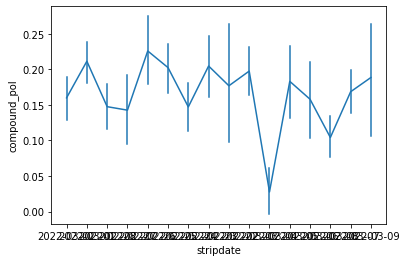

In [62]:
sns.lineplot(data=df_clean,
            x="stripdate",
            y="compound_pol",
            err_style="bars")